In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
df = pd.read_csv('crop_yield.csv')

In [6]:
print('--- Informações Gerais DF --- ')
df.info()

--- Informações Gerais DF --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [7]:
print('--- Estatísticas Descritivas --- ')
df.describe()

--- Estatísticas Descritivas --- 


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


In [9]:
df.head()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


# **Observando as informações dos dados**:

Não há nada que me chamou atenção. Não temos dados faltantes ou NA, os tipos de dados parecem corresponder com a informação. Parece OK.



# **Olhando para o describe**:

Vemos que a humidade e temperatura possuem uma variação aparentemente baixa. Essa interpretação é feita com base na comparação dos valores minimos, máximos e médios, mas limitada a compreensão do que seria uma alteração "grande" em relação a humidade e temperatura que eu possuo. Ou seja, 0,29 em relação a valores entre 17,5 e 18,70 parece baixa. A mesma coisa para humidade relativa com variação de 0,99 comparado a valores de 82,11 a 86,10.



Já a precipitação possui um desvio padrão de 289,45. Proporcionalmente, parece uma variação um pouco maior comparada aos valores mínimos e máximos (1934,62 e 3085,79).



Agora, sem dúvidas, Yield possui uma variação bruta de 70421,95 para valores mínimos de 5249 e máximos de 203399.



Outro ponto relevante é a escala dos valores. Pensando no treinamento de modelos, vamos ter que fazer uma normalização da escala para evitar enviesamento.

# Coluna Crop
Essa coluna é um object que descreve as culturas em determinadas áreas. É interessante que analisemos as culturas para identificarmos melhor quais e quantas culturas são cultivadas e suas características.

In [10]:
unique_crops = df['Crop'].unique()
print("--- Culturas Únicas na Base de Dados ---")
print(unique_crops)
print(f"\nTotal de culturas únicas: {len(unique_crops)}")

--- Culturas Únicas na Base de Dados ---
['Cocoa, beans' 'Oil palm fruit' 'Rice, paddy' 'Rubber, natural']

Total de culturas únicas: 4


In [11]:
crop_counts = df['Crop'].value_counts()
print("--- Quantidade de Registros por Cultura ---")
print(crop_counts)

--- Quantidade de Registros por Cultura ---
Crop
Cocoa, beans       39
Oil palm fruit     39
Rice, paddy        39
Rubber, natural    39
Name: count, dtype: int64


# Sobre a distribuição de Registros para Cada cultura

A base de dados está balanceada. Significa que não teremos viés no treinamento de dados por base desbalanceada.

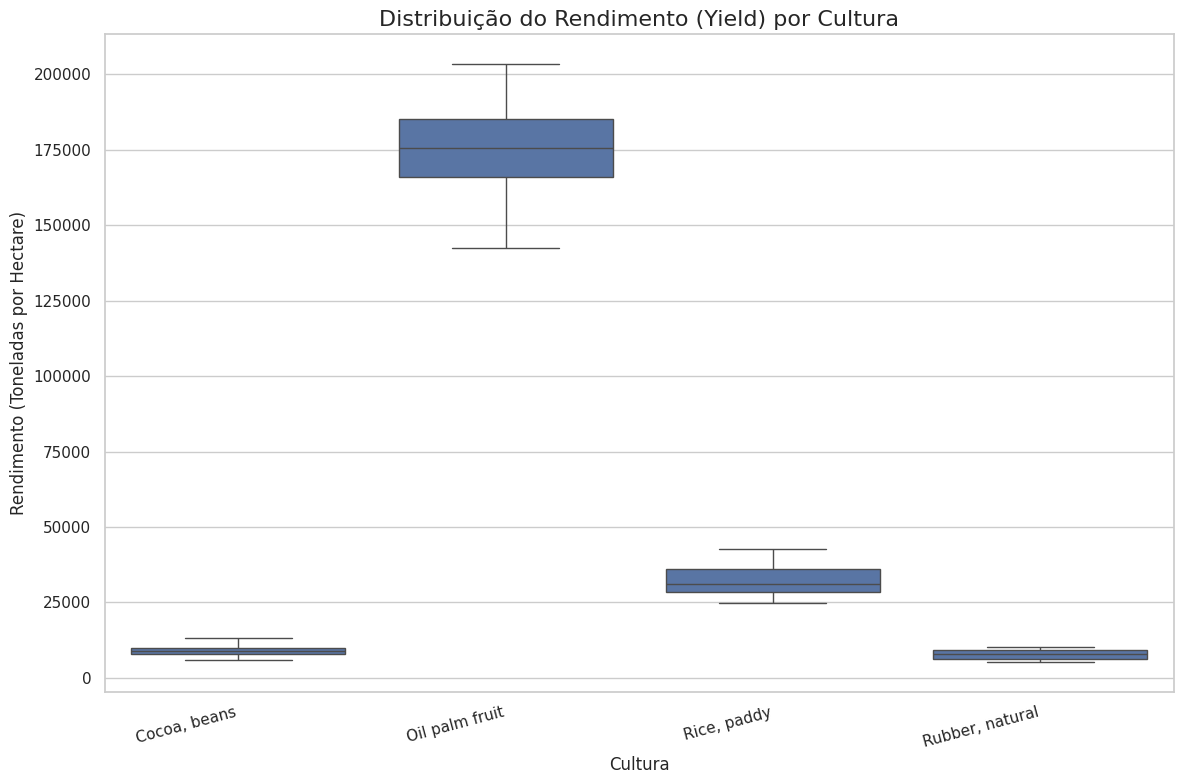

In [14]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Crop', y='Yield', data=df)

# Adicionar títulos e rótulos
plt.title('Distribuição do Rendimento (Yield) por Cultura', fontsize=16)
plt.xlabel('Cultura', fontsize=12)
plt.ylabel('Rendimento (Toneladas por Hectare)', fontsize=12)
plt.xticks(rotation=15, ha='right') # Rotaciona os rótulos do eixo x para melhor leitura
plt.tight_layout() # Ajusta o gráfico para evitar sobreposição

# Salvar a figura
plt.savefig('yield_by_crop_boxplot.png')

1. Maior rendimento, em geral, médio, mediano, mínimo ou máximo, é, obviamente, do óleo de palma.



2. Óleo de Palm é, também, a cultura com maior variação de rendimento.



3. Cacau parece tem um rendimento consistentemente baixo em comparação a outras.



4. Não parece haver outliers.

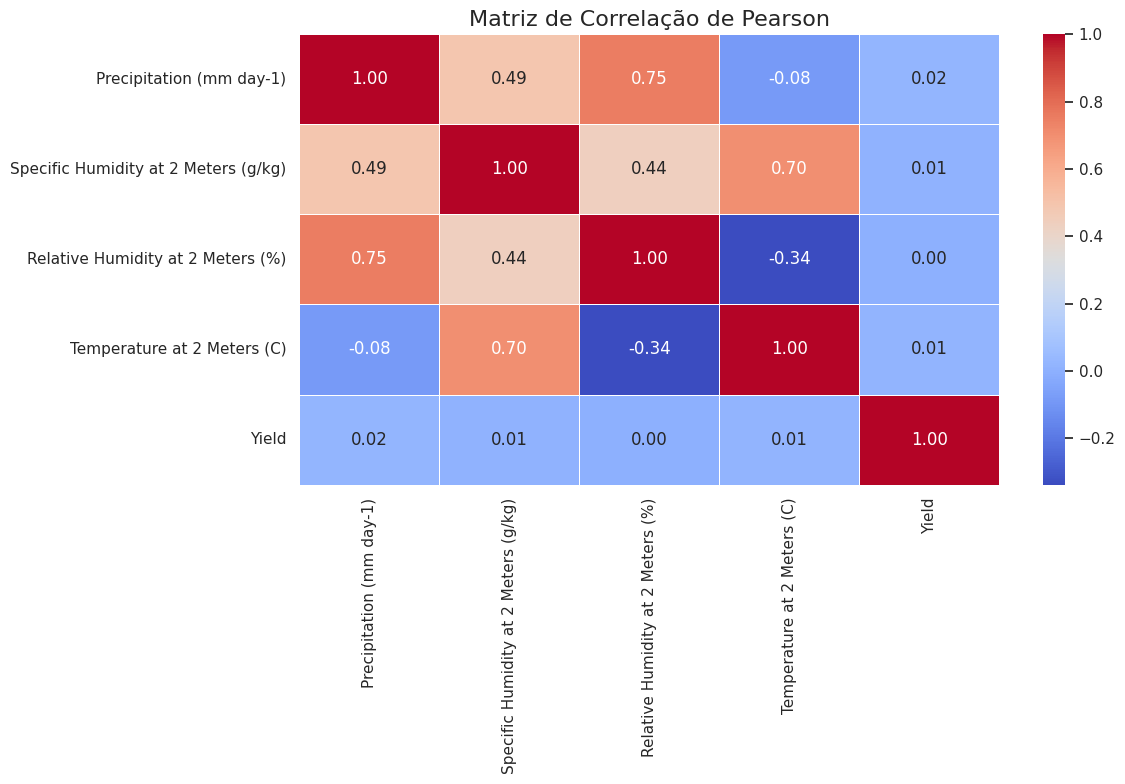

In [16]:
nums_df = df.select_dtypes(include = ['float64', 'int64'])

corr_matrix = nums_df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='0.2f', linewidths=0.5)

plt.title('Matriz de Correlação de Pearson', fontsize=16)
plt.tight_layout()

# Salvar a figura
plt.savefig('correlation_matrix.png')

1. Parece que nenhuma das variáveis possuem correlação relevante com Yield.

2. Humidade relativa possui correlação forte com precipitação. E humidade específica possui correlação com a temperatura.

3. Em relação a Yield, a menos influente é a humidade relativa, mas nenhuma mostra ter correlação com Yield.


Se a correlação linear é fraca, isso significa que as variáveis não têm poder preditivo? Ou será que a relação entre elas e o rendimento é mais complexa do que uma simples linha reta?

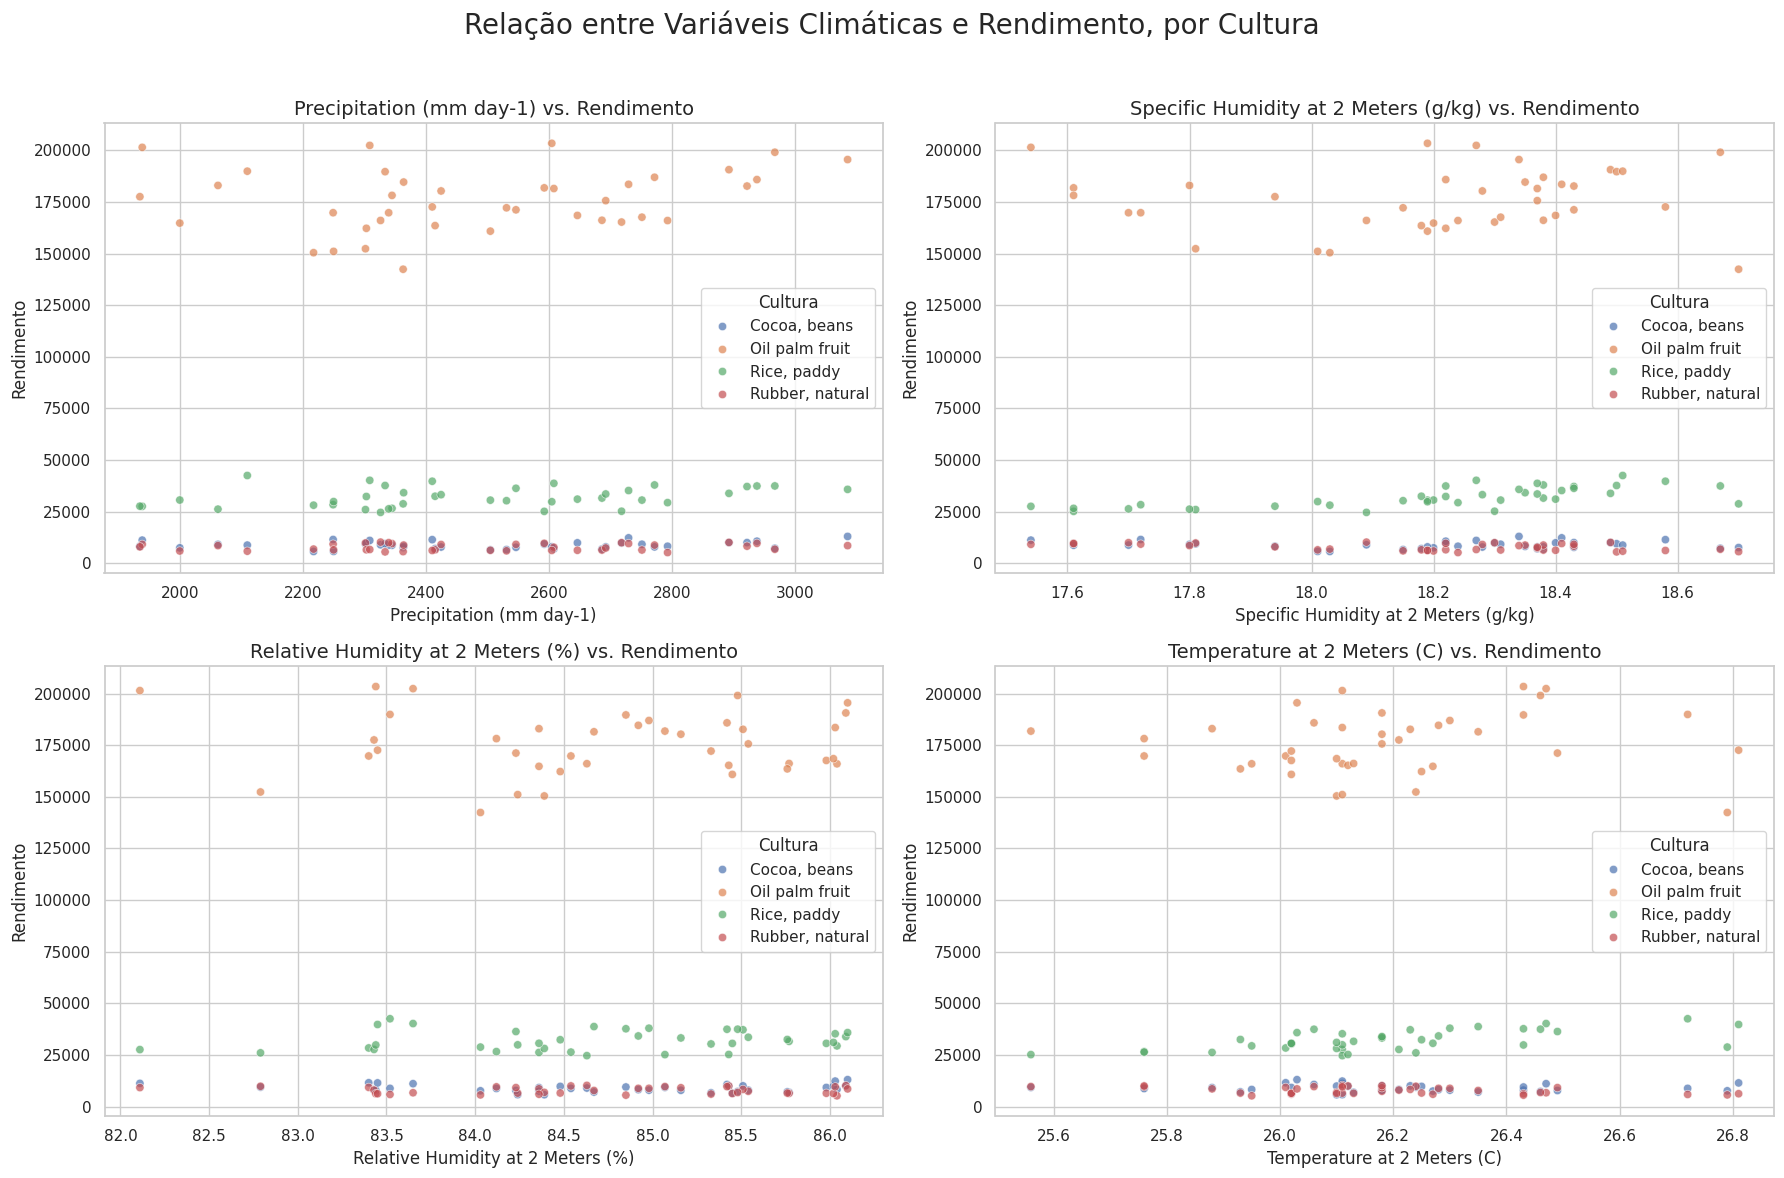

In [17]:
# Lista das variáveis de features
features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
            'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']

# Criar uma figura com 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Relação entre Variáveis Climáticas e Rendimento, por Cultura', fontsize=20)

# Achatando a matriz de eixos para facilitar a iteração
axes = axes.flatten()

# Criar um scatter plot para cada feature vs. Yield
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='Yield', hue='Crop', ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{feature} vs. Rendimento', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Rendimento', fontsize=12)
    axes[i].legend(title='Cultura')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar o layout para caber o supertítulo

# Salvar a figura
plt.savefig('features_vs_yield_by_crop.png')

1. A primeira vista, a hipótese de relação complexa não parece ser verdadeira. Não há uma correlação expressiva e evidente. Temos pontos de alto registro da variável climática com altos e baixos rendimentos, bem como pontos com baixo registro e altos e baixo rendimentos. As características climáticas parecem estar mais relacionadas com o tipo de cultura que com o rendimento. Pode ser necessário quebrar em faixas para análises.



2. Existe uma janela entre 2200 e 2400 mm de precipitação que parece conter os menores valores de rendimento. e valores entre 2800 e 3000mm com nenhum registros de "baixos" rendimentos. Porém são poucos registros nestas regiões, pode ser apenas coincidência.



3. Parece difícil dizer alguma relação clara sobre os grãos de cacau (e as outras culturas). Os dados tem uma distribuição com rosto de "feitos em laboratório". Nãom parecem dados reais. Os grãos de cacau parecem ser um pouco mais influenciados pela humidade específica. Mas pode ser simplesmente a concentração dos dados.

In [23]:
# DF Original
print("--- DataFrame Original (5 primeiras linhas) ---")
df.head()

--- DataFrame Original (5 primeiras linhas) ---


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [26]:
# Aplicar One-Hot Encoding na coluna 'Crop'
df_encoded = pd.get_dummies(df, columns=['Crop'], drop_first=False, dtype=int)
print("\n--- DataFrame Após One-Hot Encoding (5 primeiras linhas) ---")
df_encoded.head()


--- DataFrame Após One-Hot Encoding (5 primeiras linhas) ---


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,"Crop_Cocoa, beans",Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
0,2248.92,17.72,83.40,26.01,11560,1,0,0,0
1,1938.42,17.54,82.11,26.11,11253,1,0,0,0
2,2301.54,17.81,82.79,26.24,9456,1,0,0,0
3,2592.35,17.61,85.07,25.56,9321,1,0,0,0
4,2344.72,17.61,84.12,25.76,8800,1,0,0,0


In [30]:
# Separar as colunas numéricas para padronização
# Não incluímos as novas colunas dummy/binárias aqui
numeric_cols = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
                'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

# Aplicar Padronização (Standardization)
# Padronização ao invés de normalização pois é menos sensível a outliers e mais utilizado para K-Means.
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Exibir o resultado final
df_processed = df_encoded
print("\n--- DataFrame Final, Processado e Pronto para Clusterização (5 primeiras linhas) ---")
df_processed.head()


--- DataFrame Final, Processado e Pronto para Clusterização (5 primeiras linhas) ---


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,"Crop_Cocoa, beans",Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
0,-0.823415,-1.648845,-1.347084,-0.667109,-0.635267,1,0,0,0
1,-1.899565,-2.263223,-2.646141,-0.282807,-0.639640,1,0,0,0
2,-0.641042,-1.341656,-1.961367,0.216786,-0.665240,1,0,0,0
3,0.366865,-2.024299,0.334641,-2.396470,-0.667163,1,0,0,0
4,-0.491386,-2.024299,-0.622029,-1.627865,-0.674585,1,0,0,0


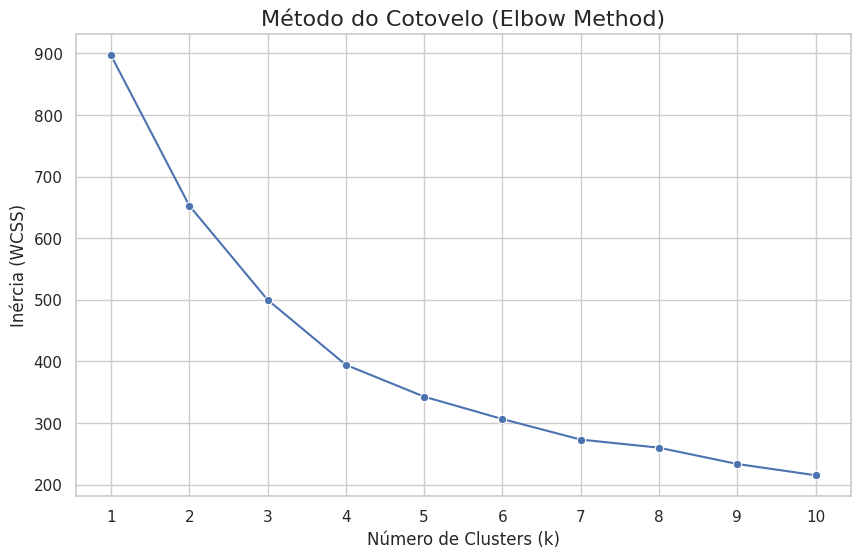

In [31]:
# Lista para armazenar a inércia (WCSS - Within-Cluster Sum of Squares)
inertia = []
# Range de clusters para testar
k_range = range(1, 11)

# Loop para rodar o KMeans para cada k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_range, y=inertia, marker='o')
plt.title('Método do Cotovelo (Elbow Method)', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia (WCSS)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)

# Salvar a figura
plt.savefig('elbow_method.png')

In [34]:
# --- Executando o K-Means com k=4 ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_processed)

# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = kmeans.labels_

# --- Analisando os Clusters ---
# Agrupando por cluster e calculando a média de cada variável
cluster_analysis = df.groupby('Cluster').mean(numeric_only=True)

print("--- Perfil Médio de Cada Cluster ---")
print(cluster_analysis.round(2))

# Verificando a distribuição das culturas em cada cluster
crop_distribution = pd.crosstab(df['Cluster'], df['Crop'])
print("\n--- Distribuição das Culturas por Cluster ---")
print(crop_distribution)

--- Perfil Médio de Cada Cluster ---
         Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
Cluster                                                                   
0                         2353.61                                 18.41   
1                         2733.52                                 18.34   
2                         2229.87                                 17.79   
3                         2583.20                                 18.30   

         Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  \
Cluster                                                                   
0                                    84.11                        26.51   
1                                    85.65                        26.12   
2                                    83.88                        25.98   
3                                    85.14                        26.19   

             Yield  
Cluster             
0         29671.42 

# Clusters:

3- Alto Rendimento

2-  Médio Rendimento

0-  Médio-Baixo Rendimento

1- Baixo Rendimento

O cluster 3 poderia aparentar um cenário de outlier devido a discrepância do rendimento em relação aos outros.

# Preparação dos Dados Train Test

In [37]:
# Preparar X e y
# Aplicar One-Hot Encoding em 'Crop' para criar as features (X)
X = pd.get_dummies(df.drop('Yield', axis=1), columns=['Crop'], drop_first=False)
# Definir a variável alvo (y)
y = df['Yield']

# 3. Dividir os dados em treino e teste
# Usaremos 80% para treino e 20% para teste. random_state garante que a divisão seja sempre a mesma.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Exibir os resultados (o "shape" de cada conjunto)
print("--- Dimensões dos Conjuntos de Dados ---")
print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_test: {y_test.shape}")

print("\n--- Exemplo de X_train (primeiras 5 linhas) ---")
X_train.head()

--- Dimensões dos Conjuntos de Dados ---
Formato de X_train: (124, 9)
Formato de y_train: (124,)
Formato de X_test: (32, 9)
Formato de y_test: (32,)

--- Exemplo de X_train (primeiras 5 linhas) ---


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Cluster,"Crop_Cocoa, beans",Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
56,2362.80,18.70,84.03,26.79,0,False,True,False,False
138,2302.99,18.22,84.48,26.25,0,False,False,False,True
123,2326.09,18.09,84.63,26.11,2,False,False,False,True
128,2249.70,18.01,84.24,26.11,2,False,False,False,True
127,2217.12,18.03,84.39,26.10,2,False,False,False,True


# Modelo 1 - Regressão Linear

In [41]:
# --- Criação e Treinamento do Modelo 1: Regressão Linear ---

# 1. Definir os passos da Pipeline
# Passo 1: Padronizar os dados
# Passo 2: Aplicar o algoritmo de Regressão Linear
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# 2. Treinar a pipeline com os dados de treino
pipeline_lr.fit(X_train, y_train)

# 3. Fazer previsões nos dados de teste
y_pred_lr = pipeline_lr.predict(X_test)

# 4. Avaliar o modelo
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("--- Modelo 1: Regressão Linear ---")
print(f"Erro Absoluto Médio (MAE): {mae_lr:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_lr:.2f}")

--- Modelo 1: Regressão Linear ---
Erro Absoluto Médio (MAE): 3141.52
Coeficiente de Determinação (R²): 1.00


Não faz sentido acertar todas as previsões, mas errar a média.
Há uma chance do modelo ter aprendido a prever a categorização com base na cultura, já que das análises exploratórias, entendemos que o maior determinante para saber se seria de alto ou baixo rendimento era a cultura.

# Modelo 2 - Árvore de Decisão

In [43]:
# --- Criação e Treinamento do Modelo 2: Árvore de Decisão ---

# 1. Definir os passos da Pipeline
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# 2. Treinar a pipeline com os dados de treino
pipeline_dt.fit(X_train, y_train)

# 3. Fazer previsões nos dados de teste
y_pred_dt = pipeline_dt.predict(X_test)

# 4. Avaliar o modelo
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("--- Modelo 2: Árvore de Decisão ---")
print(f"Erro Absoluto Médio (MAE): {mae_dt:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_dt:.2f}")

print("\n--- Resultados do Modelo 1 (Baseline) para Comparação ---")
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Regressão Linear MAE: {mae_lr:.2f}")
print(f"Regressão Linear R²: {r2_lr:.2f}")

--- Modelo 2: Árvore de Decisão ---
Erro Absoluto Médio (MAE): 3279.53
Coeficiente de Determinação (R²): 0.99

--- Resultados do Modelo 1 (Baseline) para Comparação ---
Regressão Linear MAE: 3141.52
Regressão Linear R²: 1.00


O R² parece mais honesto, mas o MAE foi maior que o da regressão. Aparente Overtfitting.

# Modelo 3 - Random Forest - Campeão

In [47]:
# --- Criação e Treinamento do Modelo 3: Random Forest ---

# 1. Definir os passos da Pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# 2. Treinar a pipeline com os dados de treino
pipeline_rf.fit(X_train, y_train)

# 3. Fazer previsões nos dados de teste
y_pred_rf = pipeline_rf.predict(X_test)

# 4. Avaliar o modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("--- Modelo 3: Random Forest ---")
print(f"Erro Absoluto Médio (MAE): {mae_rf:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_rf:.2f}")

# --- Recuperando resultados anteriores para comparação ---

print("\n--- Quadro de Resultados ---")
print(f"Modelo 1 (Regressão Linear): MAE = {mae_lr:.2f}, R² = {r2_lr:.2f}")
print(f"Modelo 2 (Árvore de Decisão): MAE = {mae_dt:.2f}, R² = {r2_dt:.2f}")
print(f"Modelo 3 (Random Forest):     MAE = {mae_rf:.2f}, R² = {r2_rf:.2f}")

--- Modelo 3: Random Forest ---
Erro Absoluto Médio (MAE): 2775.27
Coeficiente de Determinação (R²): 0.99

--- Quadro de Resultados ---
Modelo 1 (Regressão Linear): MAE = 3141.52, R² = 1.00
Modelo 2 (Árvore de Decisão): MAE = 3279.53, R² = 0.99
Modelo 3 (Random Forest):     MAE = 2775.27, R² = 0.99


Parece que conseguiu melhorar o overfit. O R² é mais honseto que o da regressão linear e o MAE mais ajustado. Sendo assim, o modelo 3 é o melhor até agora.

# Modelo 4 - SVR

In [50]:
# --- Criação e Treinamento do Modelo 4: SVR ---

# 1. Definir os passos da Pipeline
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()), # SVR é muito sensível à escala, então o scaler é crucial
    ('regressor', SVR())
])

# 2. Treinar a pipeline com os dados de treino
pipeline_svr.fit(X_train, y_train)

# 3. Fazer previsões nos dados de teste
y_pred_svr = pipeline_svr.predict(X_test)

# 4. Avaliar o modelo
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("--- Modelo 4: Support Vector Regressor (SVR) ---")
print(f"Erro Absoluto Médio (MAE): {mae_svr:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_svr:.2f}")

print("\n--- Quadro de Resultados ---")
print(f"Modelo 1 (Regressão Linear): MAE = {mae_lr:.2f}, R² = {r2_lr:.2f}")
print(f"Modelo 2 (Árvore de Decisão): MAE = {mae_dt:.2f}, R² = {r2_dt:.2f}")
print(f"Modelo 3 (Random Forest):     MAE = {mae_rf:.2f}, R² = {r2_rf:.2f}")
print(f"Modelo 4 (SVR):               MAE = {mae_svr:.2f}, R² = {r2_svr:.2f}")

--- Modelo 4: Support Vector Regressor (SVR) ---
Erro Absoluto Médio (MAE): 38963.04
Coeficiente de Determinação (R²): -0.31

--- Quadro de Resultados ---
Modelo 1 (Regressão Linear): MAE = 3141.52, R² = 1.00
Modelo 2 (Árvore de Decisão): MAE = 3279.53, R² = 0.99
Modelo 3 (Random Forest):     MAE = 2775.27, R² = 0.99
Modelo 4 (SVR):               MAE = 38963.04, R² = -0.31


O modelo foi terrível. um R² negativo significa que ele errou mais do que se tivéssemos chutado a média. Ou seja, prever com um cara-coroa teria um resultado estatisticamente melhor.

# Modelo 5 - Gradient Boost

In [53]:
# --- Criação e Treinamento do Modelo 5: Gradient Boosting ---

# 1. Definir os passos da Pipeline
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# 2. Treinar a pipeline com os dados de treino
pipeline_gb.fit(X_train, y_train)

# 3. Fazer previsões nos dados de teste
y_pred_gb = pipeline_gb.predict(X_test)

# 4. Avaliar o modelo
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("--- Modelo 5: Gradient Boosting Regressor ---")
print(f"Erro Absoluto Médio (MAE): {mae_gb:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_gb:.2f}")

print("\n--- Quadro de Resultados Final ---")
print("---------------------------------------------------------")
print(f"Modelo 1 (Regressão Linear): MAE = {mae_lr:.2f}, R² = {r2_lr:.2f}")
print(f"Modelo 2 (Árvore de Decisão): MAE = {mae_dt:.2f}, R² = {r2_dt:.2f}")
print(f"Modelo 3 (Random Forest):     MAE = {mae_rf:.2f}, R² = {r2_rf:.2f}")
print(f"Modelo 4 (SVR):               MAE = {mae_svr:.2f}, R² = {r2_svr:.2f}")
print(f"Modelo 5 (Gradient Boosting): MAE = {mae_gb:.2f}, R² = {r2_gb:.2f}")
print("---------------------------------------------------------")

--- Modelo 5: Gradient Boosting Regressor ---
Erro Absoluto Médio (MAE): 3106.14
Coeficiente de Determinação (R²): 0.99

--- Quadro de Resultados Final ---
---------------------------------------------------------
Modelo 1 (Regressão Linear): MAE = 3141.52, R² = 1.00
Modelo 2 (Árvore de Decisão): MAE = 3279.53, R² = 0.99
Modelo 3 (Random Forest):     MAE = 2775.27, R² = 0.99
Modelo 4 (SVR):               MAE = 38963.04, R² = -0.31
Modelo 5 (Gradient Boosting): MAE = 3106.14, R² = 0.99
---------------------------------------------------------


Ele teve resultados próximos ao modelo 1 e 2, não superando o modelo 3.



O melhor modelo permanece sendo o 3.